In [1]:
import ROOT
from ROOT import larlite
from ROOT import TFile
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as smp
%matplotlib inline

In [2]:
f_s = TFile("dens_pi0_all_v3.root","READ")
f_t = TFile("dens_mu_all_v3.root","READ")

#V2 contains results from running first 3 python scriptfrom DC's area
n_rads = 15
rad_inc = 5

dens_all = [] 
hits_sh = []
hits_tr = []
rad_all  = [rad_inc*(i+1) for i in xrange(0,n_rads)]

s_evts = f_s.tree.GetEntries()
t_evts = f_t.tree.GetEntries()

print s_evts, t_evts
t_evts = s_evts

print "N radS : ", n_rads
for j in xrange(n_rads):
   
    for i in xrange(s_evts):
        
        getEvt = f_s.tree.GetEntry(i)
        #print "Size ", f_s.tree.hits_per_r.size()
       
        #print "Hits ", f_s.tree.hits_per_r[j]
        hits_sh.append(f_s.tree.hits_per_r[j])  
        #dens_all.append(f_s.tree.density[j])
    
        getEvt = f_t.tree.GetEntry(i)
        hits_tr.append(f_t.tree.hits_per_r[j])  
    
    
#dens_all = np.array(dens_all).reshape(n_rads,f_s.tree.GetEntries())
#dens_all = [ i / np.cumsum(i)[-1] ]

hits_sh = np.array(hits_sh).reshape(n_rads,s_evts)
hit_sh_sum = [ float(np.cumsum(i)[-1]) / s_evts for i in hits_sh]
#print len(hits_sh[0])

hits_tr = np.array(hits_tr).reshape(n_rads,t_evts)
hit_tr_sum = [ float(np.cumsum(i)[-1]) / t_evts for i in hits_tr]

4859 4912
N radS :  15


In [3]:
def displayData(hit_sh_v,hit_sh_sum_v,hit_tr_v,hit_tr_sum_v,rad,display_dim):

    bin_size = 0.05; min_edge = 0; max_edge = 1
    N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
    bin_list = np.linspace(min_edge, max_edge, Nplus1)
    
    plt.figure(figsize=(30,30))
    #fig, ax1 = plt.subplots()
    for i in xrange(len(rad)/2,len(rad)):
        
        plt.subplot(display_dim+1,display_dim-1,i+1)
        sig0, bins_s, _ = plt.hist(hit_sh_v[i],bins=bin_list,facecolor='blue',alpha=0.5,
                 label="%.2f Hit Ratio per Event"%hit_sh_sum_v[i])
        bkgd0, bins_b, _= plt.hist(hit_tr_v[i],bins=bin_list,facecolor='red',alpha=0.5,
                 label="%.2f Hit Ratio per Event"%hit_tr_sum_v[i])
        plt.title("Ratio of shrhits : gaushits at Rad = %d [cm]"%rad[i],size=20)
        plt.xlabel("Ratio of Enclosed Shower-like Hits : Gaushits")
        plt.ylabel("Counts")
        plt.legend(loc=10)
        #plt.yscale('log', nonposy='clip')
        plt.grid(True)
        s_tot = np.cumsum(sig0)[-1]
        b_tot = np.cumsum(bkgd0)[-1]
        
        eff = [ float(np.cumsum(sig0[i:])[-1])/s_tot for i in xrange(len(sig0)) ] 
        pur = [ 1- float(np.cumsum(bkgd0[i:])[-1])/(b_tot+s_tot) for i in xrange(len(bkgd0)) ] 
        
        bins_ss = [i+bin_size/2 for i in bins_s]
        
        ax2 = plt.twinx()
        plt.plot(bins_ss[:-1],eff,'ko',label="Efficiency")       
        plt.plot(bins_ss[:-1],pur,'go',label="Purity")       
        ax2.set_ylabel('Efficiency', color='k')
        #for tl in ax2.get_yticklabels():
           #tl.set_color('r')
        ax2.set_ylim(0,1)
        
    plt.show()

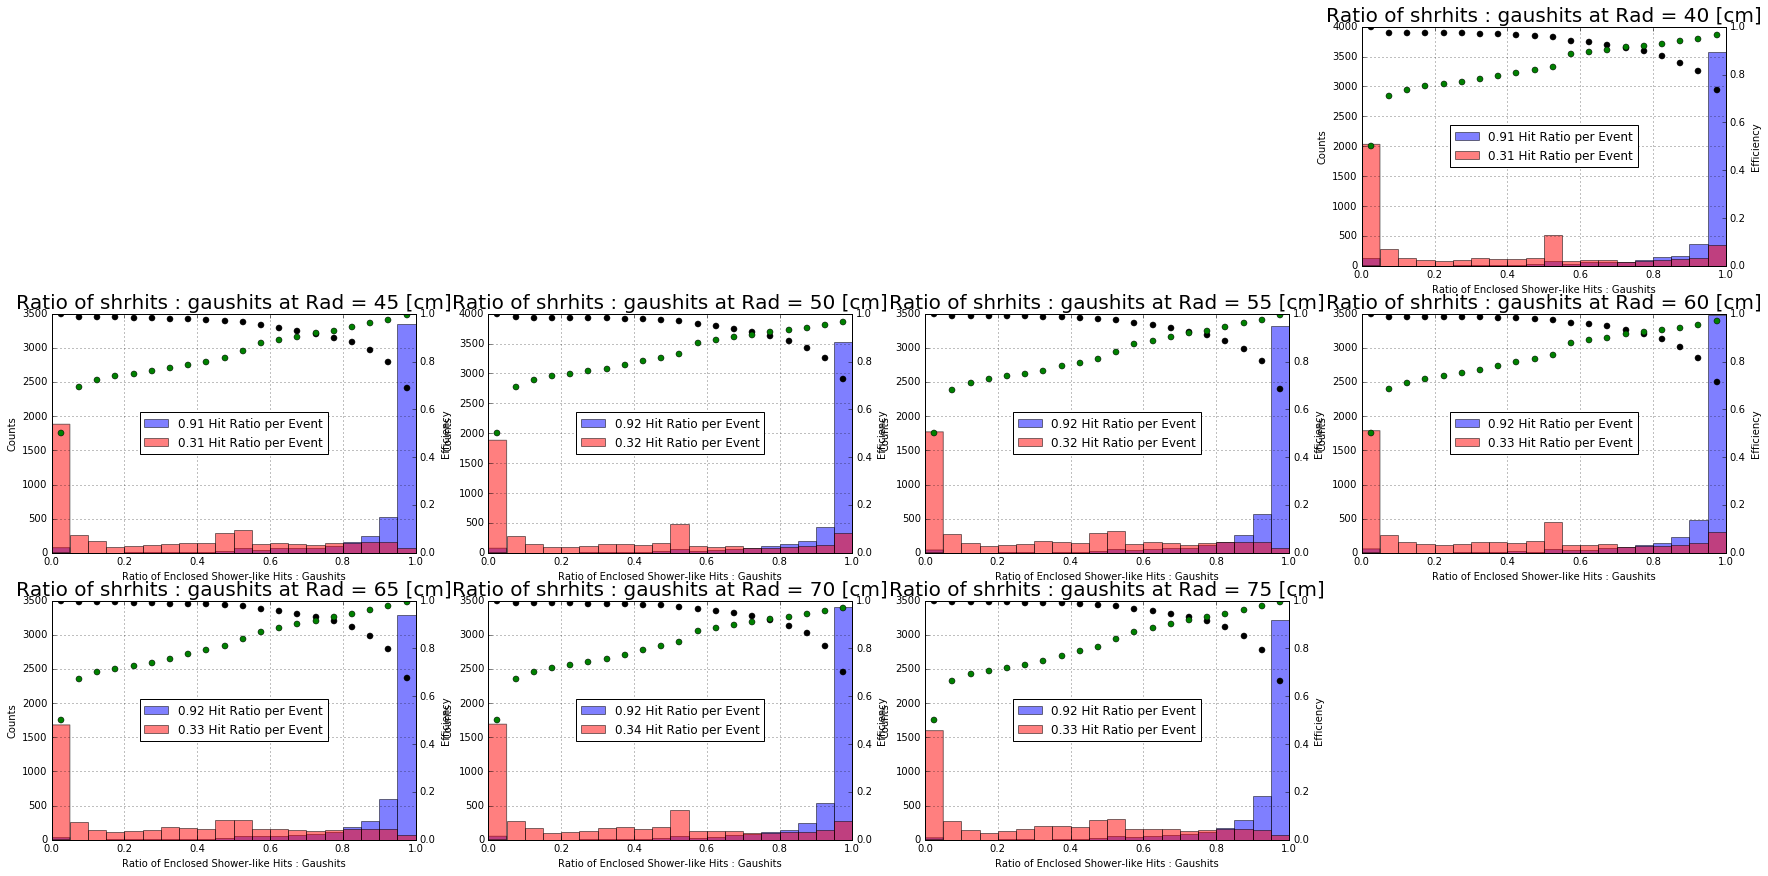

In [5]:
displayData(hits_sh,hit_sh_sum,hits_tr,hit_tr_sum,rad_all,4)

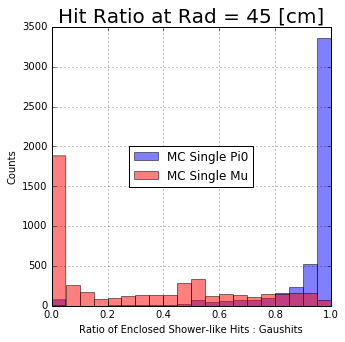

In [22]:
plt.figure(figsize=(5,5))
#for i in xrange(len(rad)/2,len(rad)):
hit_sh_v = hits_sh
hit_sh_sum_v = hit_sh_sum
hit_tr_v = hits_tr
hit_tr_sum_v = hit_tr_sum
rad = rad_all

bin_size = 0.05; min_edge = 0; max_edge = 1
N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
bin_list = np.linspace(min_edge, max_edge, Nplus1)

if True:
 
    if True:
        i =  8
        
        #plt.subplot(display_dim+1,display_dim-1,i+1)
        sig0, bins_s, _ = plt.hist(hit_sh_v[i],bins=bin_list,facecolor='blue',alpha=0.5,
                 label="MC Single Pi0")
        bkgd0, bins_b, _= plt.hist(hit_tr_v[i],bins=bin_list,facecolor='red',alpha=0.5,
                 label="MC Single Mu")
        plt.title("Hit Ratio at Rad = %d [cm]"%rad[i],size=20)
        plt.xlabel("Ratio of Enclosed Shower-like Hits : Gaushits")
        plt.ylabel("Counts")
        plt.legend(loc=10)
        #plt.yscale('log', nonposy='clip')
        plt.grid(True)
        s_tot = np.cumsum(sig0)[-1]
        b_tot = np.cumsum(bkgd0)[-1]
        
        eff = [ float(np.cumsum(sig0[i:])[-1])/s_tot for i in xrange(len(sig0)) ] 
        pur = [ 1- float(np.cumsum(bkgd0[i:])[-1])/(b_tot+s_tot) for i in xrange(len(bkgd0)) ] 
        
        bins_ss = [i+bin_size/2 for i in bins_s]
        
        #ax2 = plt.twinx()
        #plt.plot(bins_ss[:-1],eff,'ko',label="Efficiency")       
        #plt.plot(bins_ss[:-1],pur,'go',label="Purity")       
        #ax2.set_ylabel('Efficiency/Purity', color='k')
        
        #ax2.legend(loc='center left', bbox_to_anchor=(1.15, 0.5))
        #for tl in ax2.get_yticklabels():
           #tl.set_color('r')
        #ax2.set_ylim(0,1)
        
    plt.show()